# 1.import data

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv('FTrain.csv')
test=pd.read_csv('FTest.csv')


In [3]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [4]:
test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [5]:
Fsubmission = test[['uniqueid','country']]

In [6]:
train.shape,test.shape

((23524, 13), (10086, 12))

# 2.Data preparation

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


The data contains both numerical and categorical data with the object columns being the majority.Also the data has no missing  values as evident in the Non-Null count.

In [8]:
#dropping the uniqueid, we will not use it in our model building 
train.drop(['uniqueid'],axis=1,inplace = True)
test.drop(['uniqueid'],axis=1,inplace = True)

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10086 entries, 0 to 10085
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 10086 non-null  object
 1   year                    10086 non-null  int64 
 2   location_type           10086 non-null  object
 3   cellphone_access        10086 non-null  object
 4   household_size          10086 non-null  int64 
 5   age_of_respondent       10086 non-null  int64 
 6   gender_of_respondent    10086 non-null  object
 7   relationship_with_head  10086 non-null  object
 8   marital_status          10086 non-null  object
 9   education_level         10086 non-null  object
 10  job_type                10086 non-null  object
dtypes: int64(3), object(8)
memory usage: 866.9+ KB


Both the train and test have similar columns and also there are no missing values in the test set.

 Hypothetical questions we can ask
* How does country affect bank adaptation? Are there countries which lead in bank adaptation?
* Is there any relationship between bank adaptation and year? How is the relationship?
* How does banking adaptation relate in urban location to rural location?
* How does cellphone access affect banking adaptation?
* What is the relationship between household size and owning a bank account?
* How does age affect bank adaptation?
* Does gender affect bank adaptation?
* Whats relationship with head got to do with owning a bank account?
* Does the marital status of a person have a relationship with owning a bank account?
* Whats the relationship between the education level of a person and bank adaptation?
* Does job type affect bank adaptation?

In [10]:
train.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


The average household size is around 4 and the average age is around 39.

In [11]:
train.describe(include='object').T

,count,unique,top,freq
country,23524,4,Rwanda,8735
bank_account,23524,2,No,20212
location_type,23524,2,Rural,14343
cellphone_access,23524,2,Yes,17454
gender_of_respondent,23524,2,Female,13877
relationship_with_head,23524,6,Head of Household,12831
marital_status,23524,5,Married/Living together,10749
education_level,23524,6,Primary education,12791
job_type,23524,10,Self employed,6437


In [12]:
train.isnull().sum()

country                   0
year                      0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [13]:
train=train.drop_duplicates()

In [14]:
train.shape

(19095, 12)

In [15]:
train.apply(lambda x: len(x.unique()))

country                    4
year                       3
bank_account               2
location_type              2
cellphone_access           2
household_size            20
age_of_respondent         85
gender_of_respondent       2
relationship_with_head     6
marital_status             5
education_level            6
job_type                  10
dtype: int64

We can see that the year column which is  an int column behaves like a categorical column ie it is in three groups. 

# 3.EXPLORATORY DATA ANALYSIS

In [16]:
numerical_cols = [cname for cname in train.columns if train[cname].dtype in ['int64', 'float64']]
categorical_cols = [cname for cname in train.columns if train[cname].dtype == "object" and cname != 'bank_account']
# Printing numerical and categorical column lists
print('Numerical Columns: ', numerical_cols)
print('Categorical Columns: ', categorical_cols)

Numerical Columns:  ['year', 'household_size', 'age_of_respondent']
Categorical Columns:  ['country', 'location_type', 'cellphone_access', 'gender_of_respondent', 'relationship_with_head', 'marital_status', 'education_level', 'job_type']


## Distribution of categorical features

In [17]:
Categorical_Columns=['country', 'location_type', 'cellphone_access', 'gender_of_respondent','year', 
                     'relationship_with_head', 'marital_status', 'education_level', 'job_type']


Included the year column as it behaved like a categorical column.

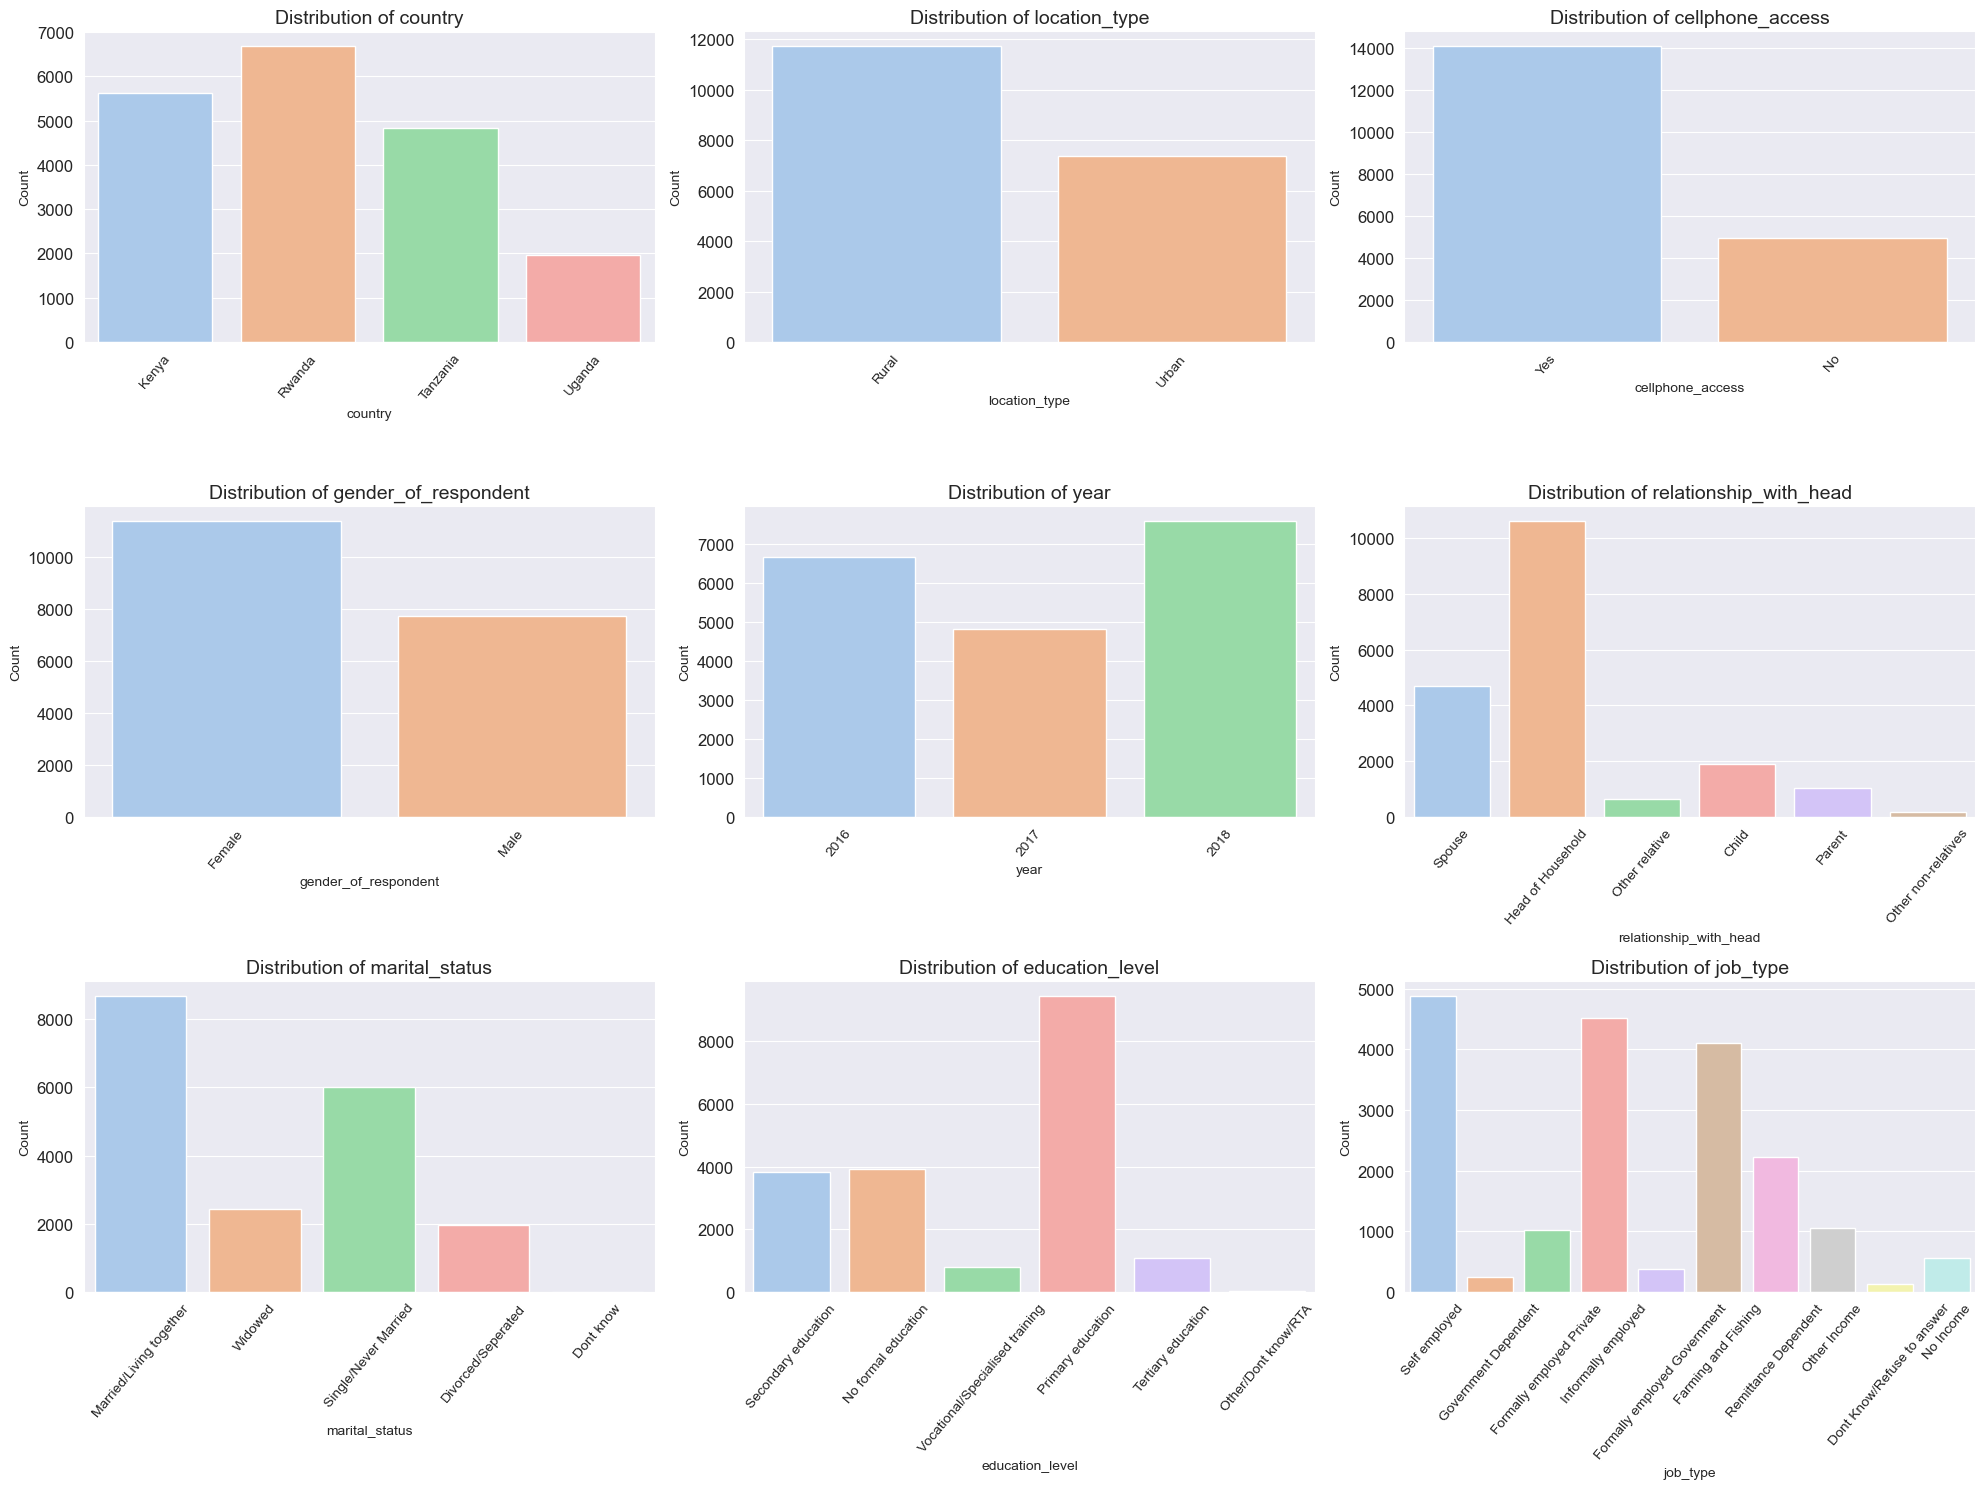

In [18]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
axes = axes.flatten()

for i, column in enumerate(Categorical_Columns):
    sns.countplot(x=column, data=train, ax=axes[i], palette='pastel')
    axes[i].set_title(f"Distribution of {column}", fontsize=14)
    axes[i].set_xlabel(f"{column}", fontsize=10)
    axes[i].set_ylabel("Count", fontsize=10)
    axes[i].tick_params(axis='x', rotation=50, labelsize=10)
    axes[i].tick_params(axis='y', labelsize=12)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()    

### Categorical Data vs Target

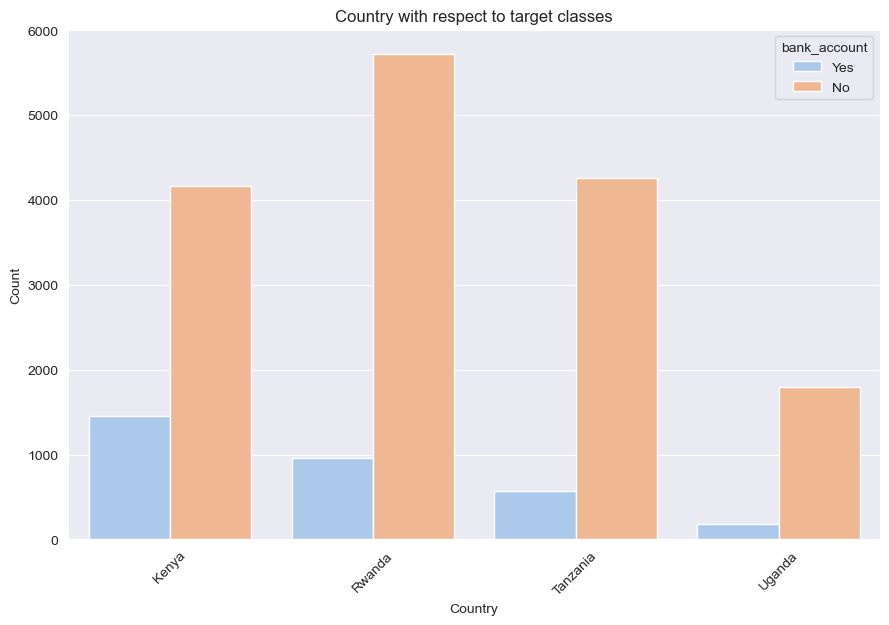

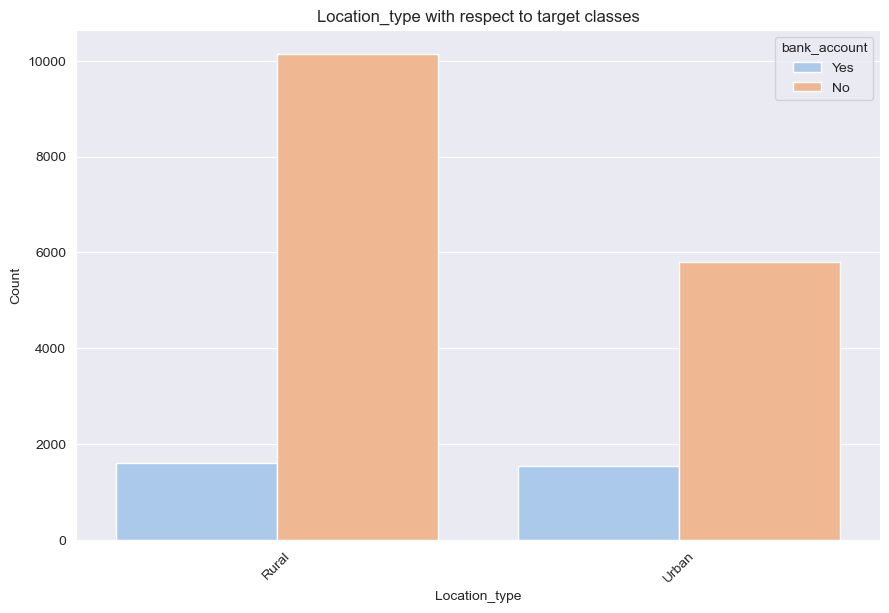

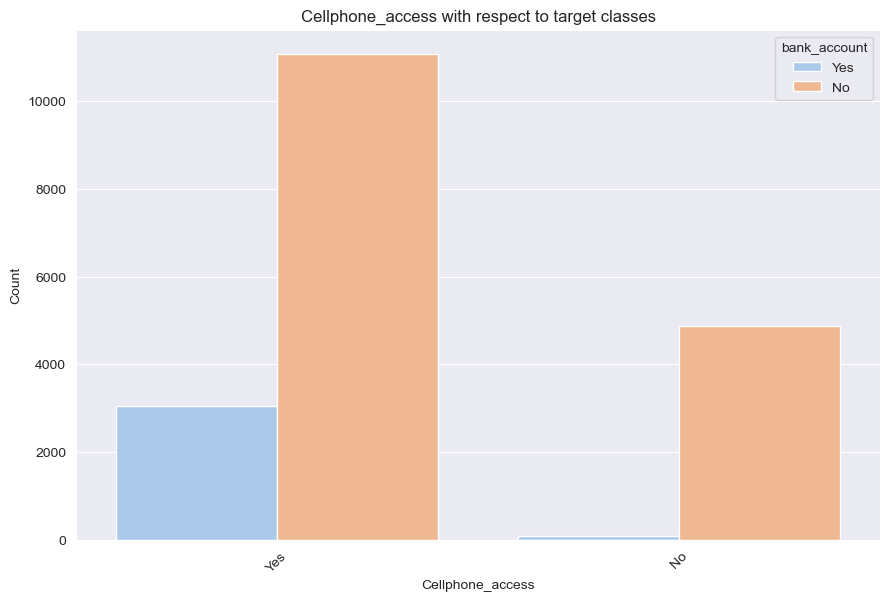

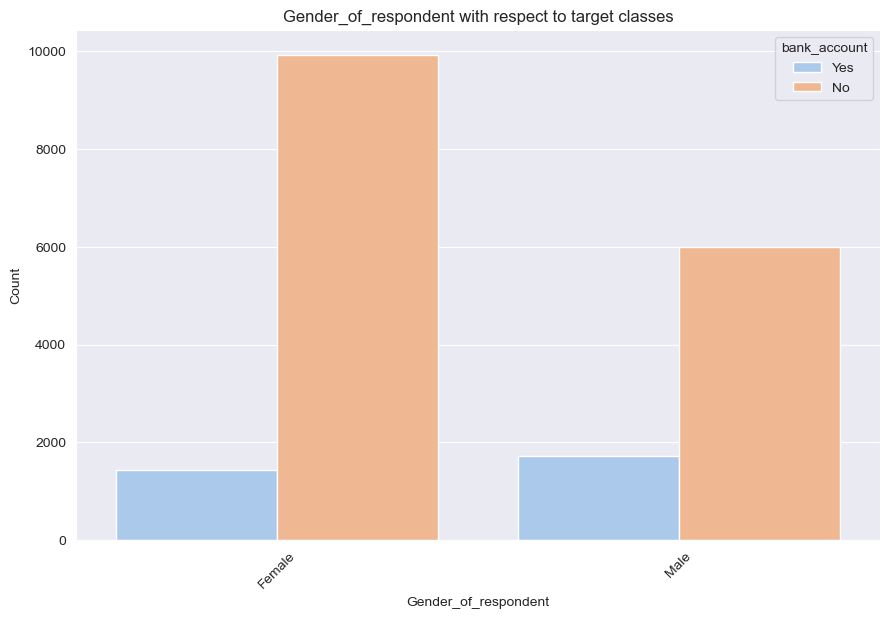

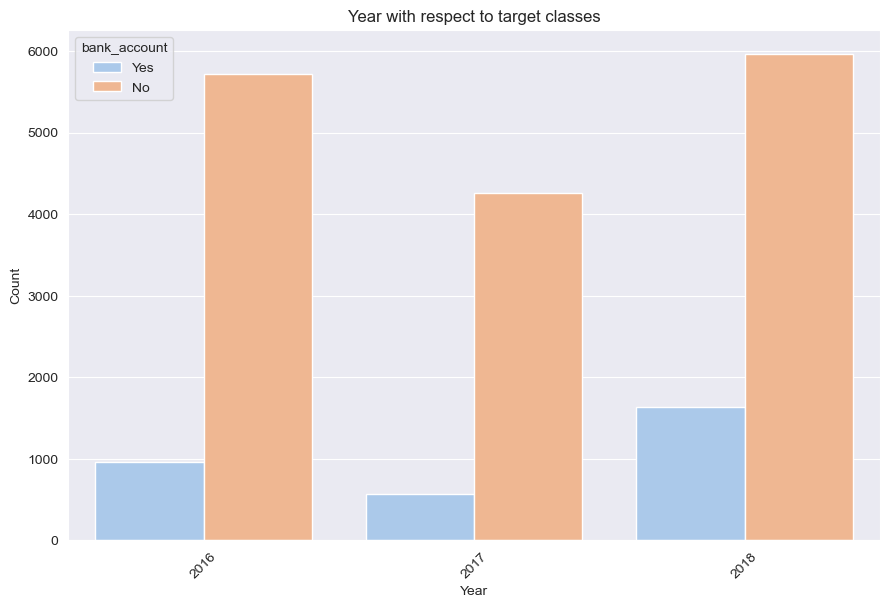

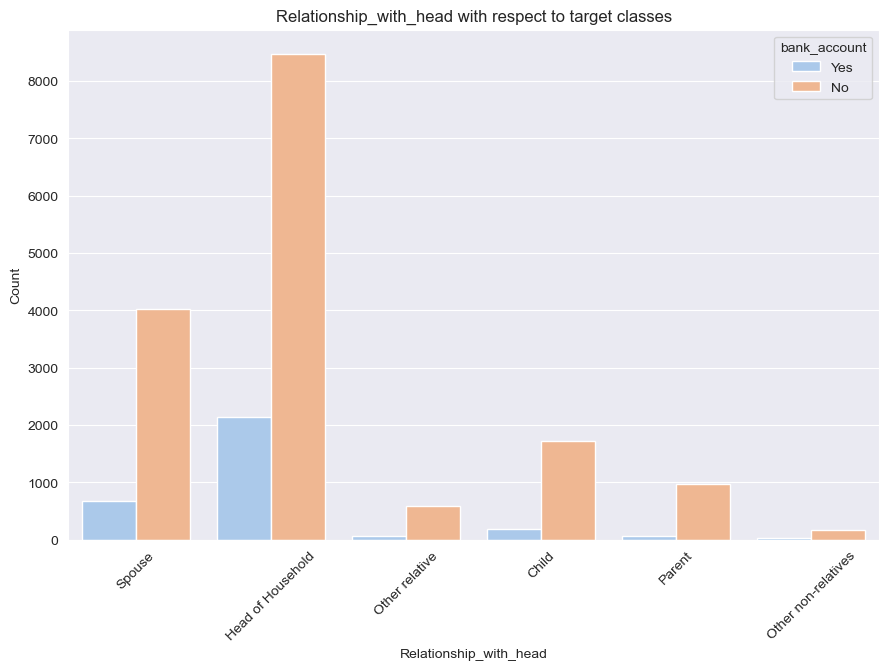

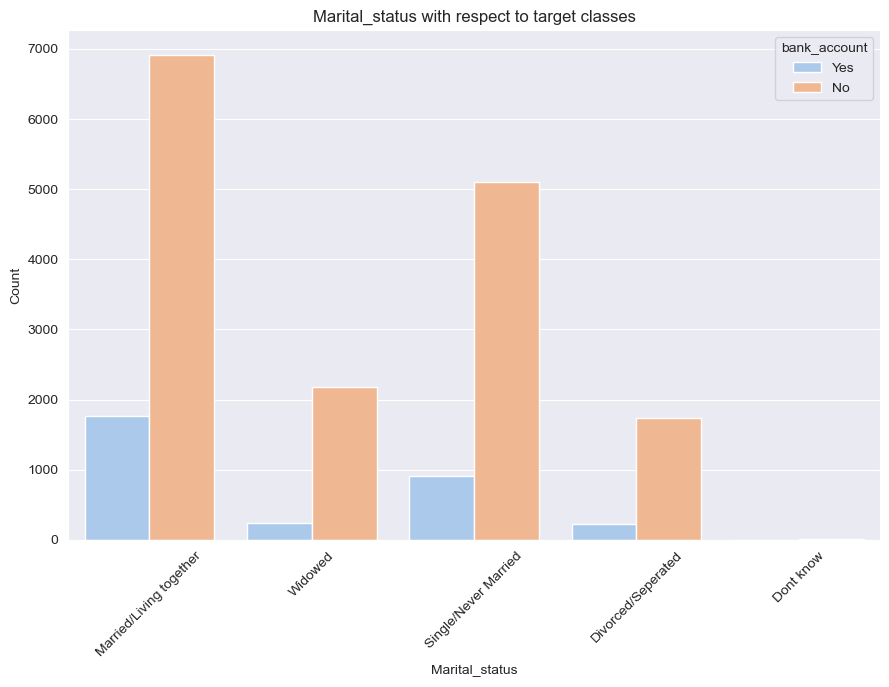

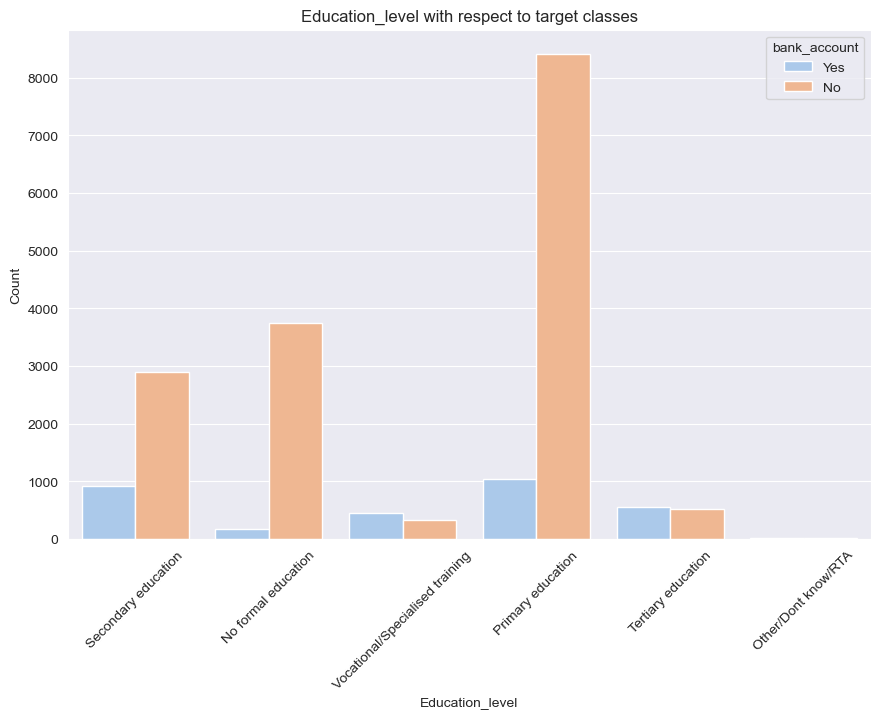

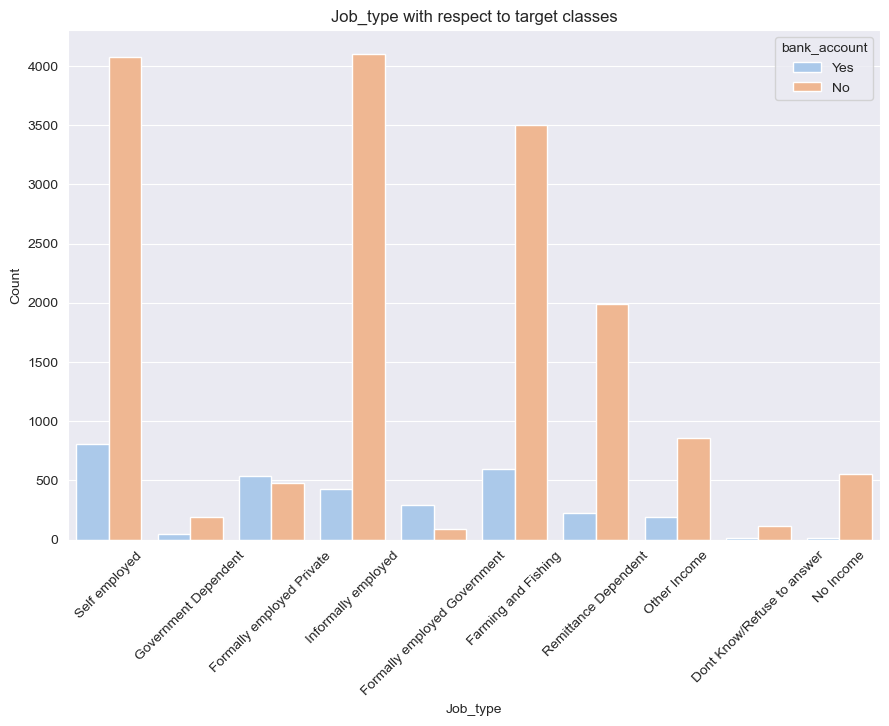

In [19]:
for col in Categorical_Columns:
    plt.figure(figsize=(9, 6))
    sns.countplot(data=train, x=col, hue='bank_account', palette='pastel')
    plt.title(f"{col.capitalize()} with respect to target classes")
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.tight_layout()
    plt.legend(title='bank_account')
    plt.xticks(rotation=45)
    plt.show()

## Distribution of numerical features

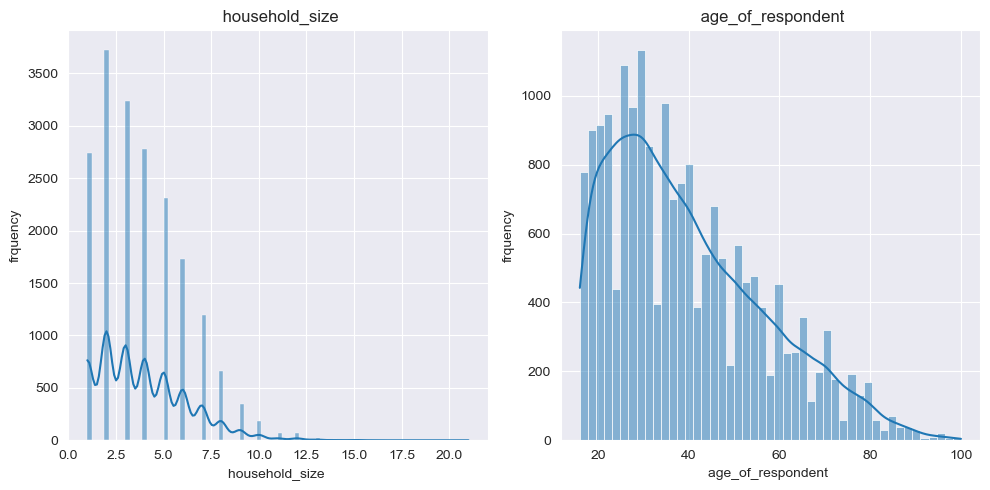

In [20]:
numerical_cols1 = ['household_size', 'age_of_respondent']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes = axes.flatten()

for i, column in enumerate(train[numerical_cols1].columns):
    sns.histplot(x=column, data=train, ax=axes[i], kde=True, palette='pastel')
    axes[i].set_title(f" {column}")
    axes[i].set_xlabel(f"{column} ")
    axes[i].set_ylabel("frquency")

plt.tight_layout()
plt.show()


### Numerical Data vs Target

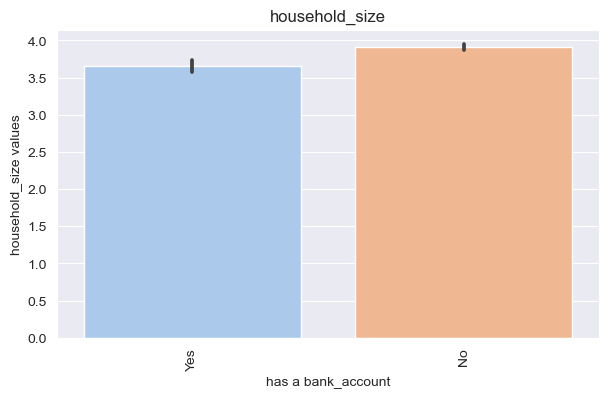

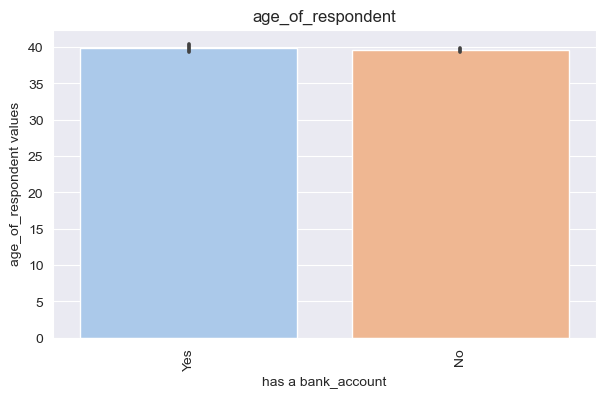

In [21]:
for col in numerical_cols1:
    plt.figure(figsize=(7,4))
    sns.barplot(x='bank_account', y=col, data=train, palette='pastel')
    plt.xticks(rotation=90)
    plt.xlabel('has a bank_account')
    plt.ylabel(f'{col} values')
    plt.title(f'{col}')
    
plt.show()

### Target variable 

In [22]:
train.shape

(19095, 12)

In [23]:
train['bank_account'].value_counts()

No     15940
Yes     3155
Name: bank_account, dtype: int64

Text(0.5, 0, 'bank_account')

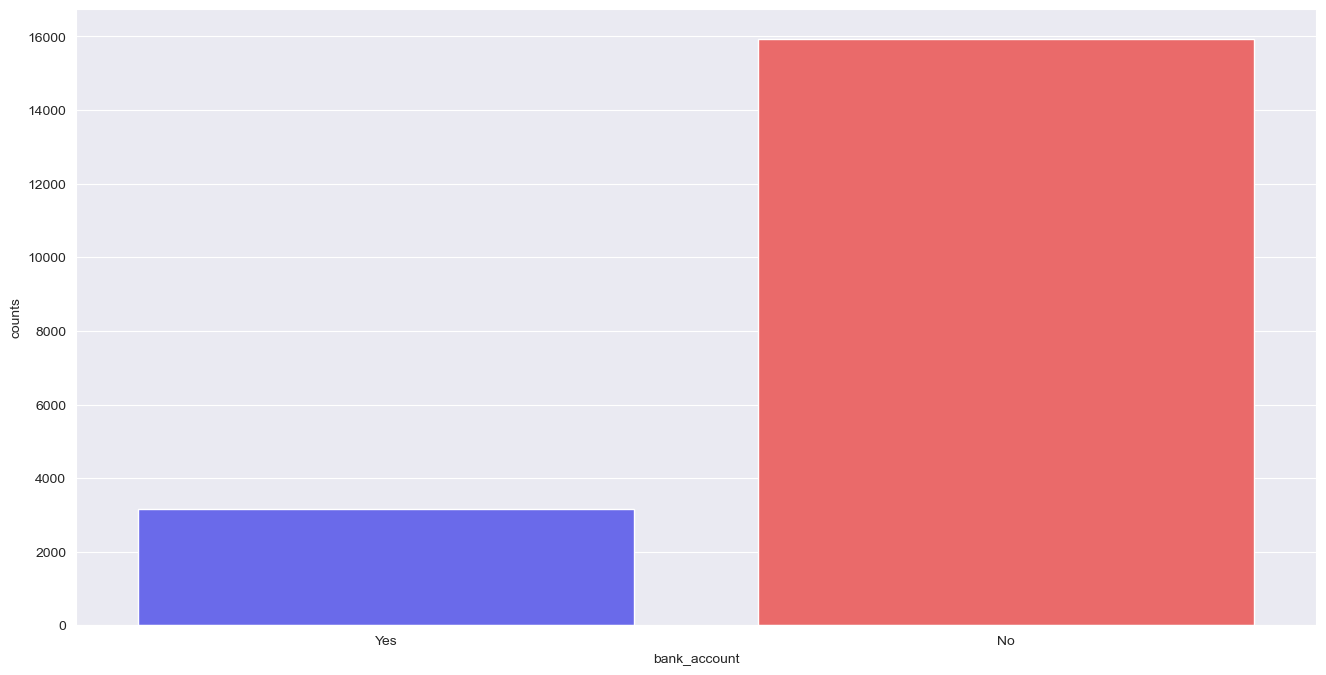

In [24]:
plt.figure(figsize=(16,8))
sns.countplot(train['bank_account'], palette='seismic')
plt.ylabel('counts')
plt.xlabel('bank_account')

This is a higly imbalanced data problem as the No response outnumber the Yes response.

## Handling Class Imbalance

We are going to achieve this by oversampling the train dataset.

In [25]:
from sklearn.utils import resample
# separate majority and minority classes
majority = train[train.bank_account == 'No']
minority = train[train.bank_account == 'Yes']
# oversample the minority class
minority_oversampled = resample(minority,
                                replace=True,
                                n_samples=len(majority),
                                random_state=42)
# combine majority class with oversampled minority class
new_data = pd.concat([majority, minority_oversampled])
# check the distribution of undersampled and oversampled datasets
oversampled_distribution = new_data.bank_account.value_counts()

oversampled_distribution


No     15940
Yes    15940
Name: bank_account, dtype: int64

# 3.Data preprocessing

In [26]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler, OrdinalEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_validate, learning_curve, RandomizedSearchCV,GridSearchCV, StratifiedKFold, cross_val_score, cross_val_predict,KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, make_scorer, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC



## Data encoding

We do this through label encoding for categorical columns with high value counts and one hot encoding with low number of value count e.g binary columns.

In [27]:
#label encoding 
le = LabelEncoder()
le_columns = ['job_type', 'education_level','marital_status','relationship_with_head','country']
for col in le_columns:
    new_data[col] = le.fit_transform(new_data[col])


In [28]:
#One hot encoding 
new_data = pd.get_dummies(new_data,columns =['location_type',
       'cellphone_access','year','gender_of_respondent'])


In [29]:
#encoding the target variable 
le_columns = ['bank_account']

for col in le_columns:
   new_data[col] = le.fit_transform(new_data[col])
new_data.head(3)

,country,bank_account,household_size,age_of_respondent,relationship_with_head,marital_status,education_level,job_type,location_type_Rural,location_type_Urban,cellphone_access_No,cellphone_access_Yes,year_2016,year_2017,year_2018,gender_of_respondent_Female,gender_of_respondent_Male
1,0,0,5,70,1,4,0,4,1,0,1,0,0,0,1,1,0
3,0,0,5,34,1,2,2,3,1,0,0,1,0,0,1,1,0
4,0,0,8,26,0,3,2,5,0,1,1,0,0,0,1,0,1


### Encoding the test data

In [30]:
#label encoding 
le = LabelEncoder()
le_columns = ['job_type', 'education_level','marital_status','relationship_with_head','country']
for col in le_columns:
    test[col] = le.fit_transform(test[col])


In [31]:
#One hot encoding 
test = pd.get_dummies(test,columns =['location_type',
       'cellphone_access','year','gender_of_respondent'])


In [32]:
test.head()

,country,household_size,age_of_respondent,relationship_with_head,marital_status,education_level,job_type,location_type_Rural,location_type_Urban,cellphone_access_No,cellphone_access_Yes,year_2016,year_2017,year_2018,gender_of_respondent_Female,gender_of_respondent_Male
0,0,3,30,1,2,3,2,0,1,0,1,0,0,1,0,1
1,0,7,51,1,2,5,3,0,1,0,1,0,0,1,0,1
2,0,3,77,4,2,0,8,1,0,1,0,0,0,1,1,0
3,0,6,39,1,2,2,8,1,0,1,0,0,0,1,1,0
4,0,3,16,0,3,3,8,0,1,1,0,0,0,1,0,1


## Correlation

#### 1. Negative correlation with the target

In [33]:
new_data.corr()['bank_account'].sort_values()[new_data.corr()['bank_account'].sort_values() < 0]

cellphone_access_No           -0.362190
country                       -0.212495
gender_of_respondent_Female   -0.163001
location_type_Rural           -0.127139
year_2017                     -0.105452
job_type                      -0.102524
relationship_with_head        -0.075990
household_size                -0.064287
year_2016                     -0.062394
marital_status                -0.036024
Name: bank_account, dtype: float64

#### 2. Positive correlation with the Target

In [34]:
new_data.corr()['bank_account'].sort_values()[new_data.corr()['bank_account'].sort_values() > 0]

age_of_respondent            0.006641
location_type_Urban          0.127139
year_2018                    0.147312
gender_of_respondent_Male    0.163001
cellphone_access_Yes         0.362190
education_level              0.413224
bank_account                 1.000000
Name: bank_account, dtype: float64

### Correlation Visually

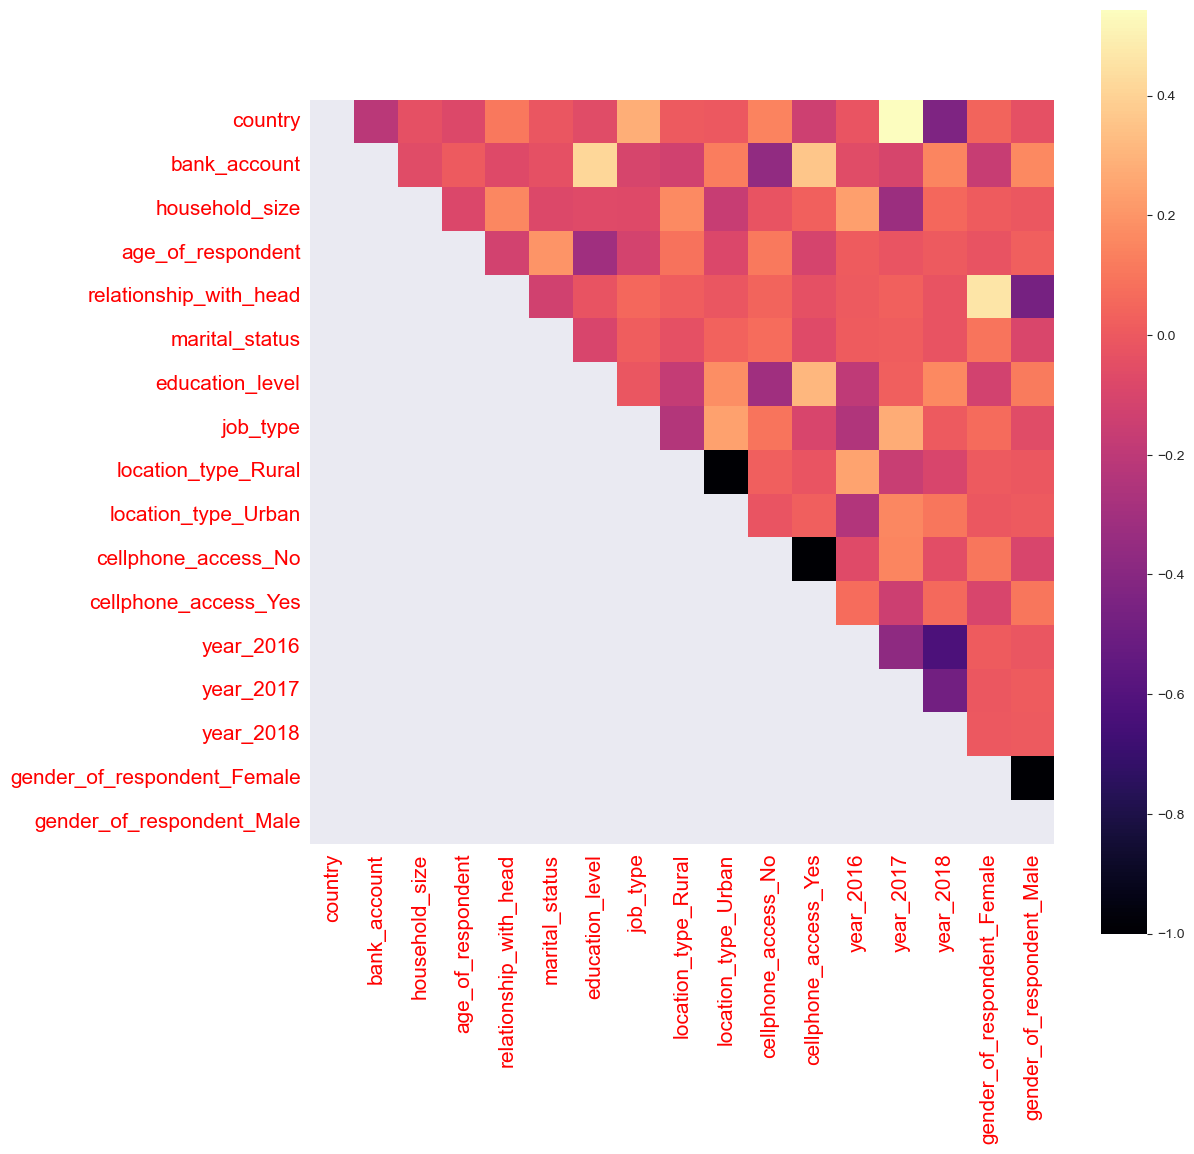

In [35]:
plt.figure(figsize = (12,12))
corr_matrix=new_data.corr()
 
matrix = np.tril(corr_matrix) # take lower correlation matrix

# Draw the heatmap with the mask
sns.heatmap(corr_matrix.T, mask=matrix, square=True, cmap = 'magma')
plt.xticks(size = 15,color = 'red')
plt.yticks(size = 15,  color = 'red');

#### Train test and split

In [36]:
X = new_data.drop(['bank_account'],axis=1)
y = new_data['bank_account']

In [37]:
X.shape,y.shape

((31880, 16), (31880,))

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(25504, 16)
(25504,)
(6376, 16)
(6376,)


In [39]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Model building 

In [40]:
models = [
    ('LR', LogisticRegression()),
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier()),
    ('NB', GaussianNB()),
    ('SVM', SVC())
]

num_folds = 10
seed = 42
scoring = 'accuracy'
# Variables to store results
results = []
names = []

# Evaluation
for name, model in models:
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean():.6f} ({cv_results.std():.6f})")

LR: 0.734002 (0.005975)
KNN: 0.822224 (0.008240)
CART: 0.904172 (0.007588)
NB: 0.675972 (0.009972)
SVM: 0.773368 (0.010472)


Our best model for this data is the Decision Tree Classifier.Lets have a look at how the ensemble models perform in our data.

## Trying ensemble models

In [41]:
ensembles = [
    
    
    ('XGB',  XGBClassifier()),
    ('AB', AdaBoostClassifier()),
    ('GBM', GradientBoostingClassifier()),
    ('RF', RandomForestClassifier()),
    ('ET', ExtraTreesClassifier())
    
]

num_folds = 10
seed = 42

scoring = 'accuracy'

results = []
names = []

for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = f"{name}: {cv_results.mean():.4f} ({cv_results.std():.4f})"
    print(msg)

XGB: 0.8421 (0.0076)
AB: 0.7592 (0.0082)
GBM: 0.7765 (0.0092)
RF: 0.9162 (0.0103)
ET: 0.9247 (0.0089)


#### Tuning decision tree model

In [42]:
# Define the Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# Define the hyperparameter space
param_dist = {
    'max_depth': [None] + list(np.arange(1, 20)),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 11),
    'criterion': ['gini', 'entropy']
}

# Perform randomized search cross-validation
num_folds = 5
seed = 42
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
R_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=100, cv=kfold, scoring='accuracy', n_jobs=-1, verbose=1, random_state=seed)
R_search.fit(X_train, y_train)

# Get the best model from randomized search
best_model = R_search.best_estimator_

# Predict and evaluate the model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Best parameters found: {R_search.best_params_}')
print(f'Accuracy of the best model: {accuracy:.4f}')

# Show the cross-validation results for each fold
cv_results = R_search.cv_results_
mean_test_scores = cv_results['mean_test_score']
std_test_scores = cv_results['std_test_score']
params = cv_results['params']

print("\nCross-validation results:")
for mean, std, param in zip(mean_test_scores, std_test_scores, params):
    print(f"Mean test score: {mean:.4f} (std: {std:.4f}) for {param}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found: {'min_samples_split': 7, 'min_samples_leaf': 1, 'max_depth': 19, 'criterion': 'entropy'}
Accuracy of the best model: 0.8604

Cross-validation results:
Mean test score: 0.7923 (std: 0.0045) for {'min_samples_split': 10, 'min_samples_leaf': 9, 'max_depth': 14, 'criterion': 'gini'}
Mean test score: 0.7991 (std: 0.0044) for {'min_samples_split': 10, 'min_samples_leaf': 8, 'max_depth': 17, 'criterion': 'gini'}
Mean test score: 0.8136 (std: 0.0046) for {'min_samples_split': 5, 'min_samples_leaf': 5, 'max_depth': 19, 'criterion': 'entropy'}
Mean test score: 0.7986 (std: 0.0040) for {'min_samples_split': 4, 'min_samples_leaf': 8, 'max_depth': 19, 'criterion': 'entropy'}
Mean test score: 0.7009 (std: 0.0063) for {'min_samples_split': 6, 'min_samples_leaf': 4, 'max_depth': 2, 'criterion': 'gini'}
Mean test score: 0.8425 (std: 0.0058) for {'min_samples_split': 7, 'min_samples_leaf': 1, 'max_depth': 19, 'criterio

### Tuning random forest model

In [43]:
# Define the Random Forest model
model = RandomForestClassifier(random_state=42)

# Define the hyperparameter space
param_dist = {
    'n_estimators': np.arange(10, 200, 10),
    'max_depth': [None] + list(np.arange(1, 20)),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 11),
    'bootstrap': [True, False]
}

# Perform randomized search cross-validation
num_folds = 5
seed = 42
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
R_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=100, cv=kfold, scoring='accuracy', n_jobs=-1, verbose=1, random_state=seed)
R_search.fit(X_train, y_train)

# Get the best model from randomized search
best_model = R_search.best_estimator_

# Predict and evaluate the model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Best parameters found: {R_search.best_params_}')
print(f'Accuracy of the best model: {accuracy:.4f}')

# Show the cross-validation results for each fold
cv_results = R_search.cv_results_
mean_test_scores = cv_results['mean_test_score']
std_test_scores = cv_results['std_test_score']
params = cv_results['params']

print("\nCross-validation results:")
for mean, std, param in zip(mean_test_scores, std_test_scores, params):
    print(f"Mean test score: {mean:.4f} (std: {std:.4f}) for {param}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found: {'n_estimators': 190, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_depth': 19, 'bootstrap': False}
Accuracy of the best model: 0.9137

Cross-validation results:
Mean test score: 0.7949 (std: 0.0049) for {'n_estimators': 70, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_depth': 9, 'bootstrap': True}
Mean test score: 0.8223 (std: 0.0073) for {'n_estimators': 60, 'min_samples_split': 2, 'min_samples_leaf': 6, 'max_depth': None, 'bootstrap': True}
Mean test score: 0.8329 (std: 0.0074) for {'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 12, 'bootstrap': False}
Mean test score: 0.7396 (std: 0.0053) for {'n_estimators': 150, 'min_samples_split': 7, 'min_samples_leaf': 7, 'max_depth': 3, 'bootstrap': True}
Mean test score: 0.7158 (std: 0.0056) for {'n_estimators': 120, 'min_samples_split': 6, 'min_samples_leaf': 8, 'max_depth': 1, 'bootstrap': False}
Mean test s

### Tuning Extra Trees model

In [44]:
# Define the Extra Trees model
model = ExtraTreesClassifier(random_state=42)

# Define the hyperparameter space
param_dist = {
    'n_estimators': np.arange(10, 200, 10),
    'max_depth': [None] + list(np.arange(1, 20)),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 11),
    'bootstrap': [True, False]
}

# Perform randomized search cross-validation
num_folds = 5
seed = 42
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
R_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=100, cv=kfold, scoring='accuracy', n_jobs=-1, verbose=1, random_state=seed)
R_search.fit(X_train, y_train)

# Get the best model from randomized search
best_model = R_search.best_estimator_

# Predict and evaluate the model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Best parameters found: {R_search.best_params_}')
print(f'Accuracy of the best model: {accuracy:.4f}')

# Show the cross-validation results for each fold
cv_results = R_search.cv_results_
mean_test_scores = cv_results['mean_test_score']
std_test_scores = cv_results['std_test_score']
params = cv_results['params']

print("\nCross-validation results:")
for mean, std, param in zip(mean_test_scores, std_test_scores, params):
    print(f"Mean test score: {mean:.4f} (std: {std:.4f}) for {param}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found: {'n_estimators': 190, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_depth': 19, 'bootstrap': False}
Accuracy of the best model: 0.8970

Cross-validation results:
Mean test score: 0.7691 (std: 0.0051) for {'n_estimators': 70, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_depth': 9, 'bootstrap': True}
Mean test score: 0.7858 (std: 0.0072) for {'n_estimators': 60, 'min_samples_split': 2, 'min_samples_leaf': 6, 'max_depth': None, 'bootstrap': True}
Mean test score: 0.8048 (std: 0.0056) for {'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 12, 'bootstrap': False}
Mean test score: 0.7207 (std: 0.0049) for {'n_estimators': 150, 'min_samples_split': 7, 'min_samples_leaf': 7, 'max_depth': 3, 'bootstrap': True}
Mean test score: 0.6730 (std: 0.0130) for {'n_estimators': 120, 'min_samples_split': 6, 'min_samples_leaf': 8, 'max_depth': 1, 'bootstrap': False}
Mean test s

The random forest perfomed well of the three  with  a 91% accuracy.

## Final model

In [45]:
# Define the Random Forest model with the best hyperparameters found
best_params = {
    'n_estimators': 190,
    'min_samples_split': 7,
    'min_samples_leaf': 1,
    'max_depth': 19,
    'bootstrap': False,
    'random_state': 42
}

model = RandomForestClassifier(**best_params)

# Train the model on the training set
model.fit(X_train, y_train)

# Predict and evaluate the model on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the best model: {accuracy:.4f}')

Accuracy of the best model: 0.9137


## Predicting test data

In [46]:
test = scaler.transform(test)

In [47]:
test_pred=best_model.predict(test)
test_pred

array([1, 1, 0, ..., 0, 0, 0])

In [48]:
Fsubmission['bank_account'] = test_pred
Fsubmission


,uniqueid,country,bank_account
0,uniqueid_6056,Kenya,1
1,uniqueid_6060,Kenya,1
2,uniqueid_6065,Kenya,0
3,uniqueid_6072,Kenya,0
4,uniqueid_6073,Kenya,0
...,...,...,...
10081,uniqueid_2998,Uganda,0
10082,uniqueid_2999,Uganda,0
10083,uniqueid_3000,Uganda,0
10084,uniqueid_3001,Uganda,0


In [49]:
Fsubmission.bank_account.value_counts()

0    7619
1    2467
Name: bank_account, dtype: int64

In [50]:
Fsubmission['uniqueid'] = Fsubmission['uniqueid'] + ' x ' + Fsubmission['country']
Fsubmission

,uniqueid,country,bank_account
0,uniqueid_6056 x Kenya,Kenya,1
1,uniqueid_6060 x Kenya,Kenya,1
2,uniqueid_6065 x Kenya,Kenya,0
3,uniqueid_6072 x Kenya,Kenya,0
4,uniqueid_6073 x Kenya,Kenya,0
...,...,...,...
10081,uniqueid_2998 x Uganda,Uganda,0
10082,uniqueid_2999 x Uganda,Uganda,0
10083,uniqueid_3000 x Uganda,Uganda,0
10084,uniqueid_3001 x Uganda,Uganda,0


In [51]:
Fsubmission =Fsubmission.drop('country',axis=1)

In [52]:
Fsubmission

,uniqueid,bank_account
0,uniqueid_6056 x Kenya,1
1,uniqueid_6060 x Kenya,1
2,uniqueid_6065 x Kenya,0
3,uniqueid_6072 x Kenya,0
4,uniqueid_6073 x Kenya,0
...,...,...
10081,uniqueid_2998 x Uganda,0
10082,uniqueid_2999 x Uganda,0
10083,uniqueid_3000 x Uganda,0
10084,uniqueid_3001 x Uganda,0


In [53]:
Fsubmission.to_csv('AFI submission',index=False)